# Kaggle Outbrain competition
https://www.kaggle.com/c/outbrain-click-prediction
#### This is an initial analysis of the data as part of the 'Create your Data Story' project for Springboard Data Science Intensive course.

In [1]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from datetime import datetime
#sns.set_style('whitegrid')
%matplotlib inline

In [6]:
clicks_train = pd.read_csv('./data/clicks_train.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

In [7]:
train_grp_ad = clicks_train.groupby(clicks_train['ad_id'])

In [8]:
ctr = train_grp_ad['clicked'].mean()

how many ads were clicked per session. 

how many session an ad was clicked versus no ad was clicked

In [11]:
c = train_grp_ad['clicked'].sum()

In [12]:
all_clicked = c[c != 0]

In [13]:
not_clicked = c[c == 0]

In [14]:
not_clicked.shape[0] * 100 /c.shape[0]

46

### Almost 47% of ads were not even clicked once

## How often were the ads repeated?

In [15]:
repeat = train_grp_ad['clicked'].count()

In [16]:
repeat.mean()

181.9432738281658

## Each Ad was repeated on an average 182 times

## Is there is relationship between the number of times an ad is repeated and it's CTR?

In [17]:
repeat.corr(ctr)

0.022056326354103151

## Corelation is almost 0

## But how about only ads that were clicked atleast once?

In [18]:
repeat.corr(ctr[ctr > 0])

-0.041137348769934606

## There is a negative correlation as expected but it is still negligible

## But how frequently and at what times did these click happen? 
## For that lets look at the distribution of the display_ids...

In [2]:
events_df = pd.read_csv('./data/events.csv',  dtype={"display_id": int, "uuid": str, "document_id": int, "timestamp": int, "platform": str, "geo_location": str})

### How about distribution of ad during the day? Where there times during the day where more ads were clicked?

In [95]:
## normalization to start of hour
timestamps_hrly = (events_df.timestamp // (3600 * 1000)) % 24


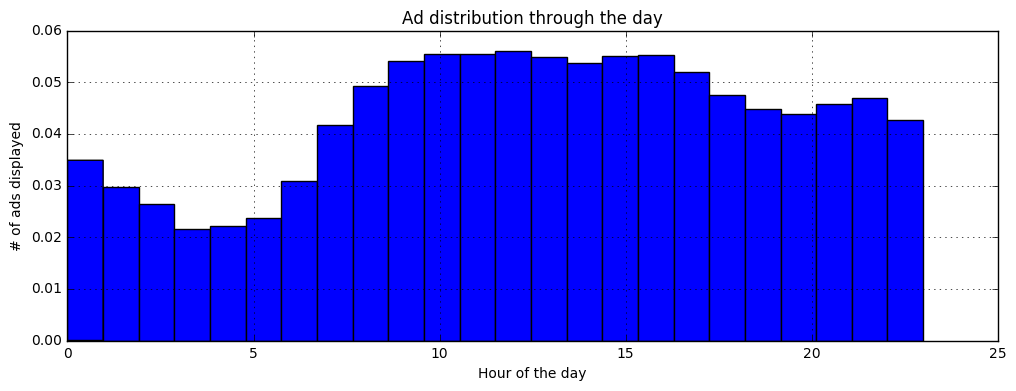

In [96]:
plt.figure(figsize=(12,4))
ax = timestamps_hrly.hist(bins=24,normed=True)
ax.set_xlabel("Hour of the day")
ax.set_ylabel("# of ads displayed")
plt.title("Ad distribution through the day")

0 is

GMT: Tue, 14 Jun 2016 03:59:59.998 GMT

US Eastern: Monday, June 13, 2016 11:59:59 PM GMT-4:00 DST

### It appears that acitivity picks up after 8:00am in the afternoon till around 10:00pm in the night

In [3]:
map = events_df['geo_location'].drop_duplicates()

In [4]:
map = map.str.split('>', expand=True).rename(columns={0:'Country', 1:'State', 2: 'DMA'}).join(map)

In [5]:
a = pd.merge(events_df, map, on='geo_location')

In [6]:
a.head()

,display_id,uuid,document_id,timestamp,platform,geo_location,Country,State,DMA
0,1,cb8c55702adb93,379743,61,3,US>SC>519,US,SC,519
1,4259,7110c665e40cdd,1178289,291717,3,US>SC>519,US,SC,519
2,4320,d4d864f476b3ec,1226959,296045,2,US>SC>519,US,SC,519
3,4404,6a7174e486a1fa,26448,300907,3,US>SC>519,US,SC,519
4,4565,1ae3131f93a2d9,1750803,312675,1,US>SC>519,US,SC,519


In [7]:
geogrp = a.groupby(['Country'])  #, 'State', 'DMA'])

In [39]:
x = geogrp.size().sort_values(ascending=False)

In [40]:
x = x * 100/x.sum()

In [41]:
y = x.sort_values(ascending=False).head(10)

## Distribution by Country (top 10)

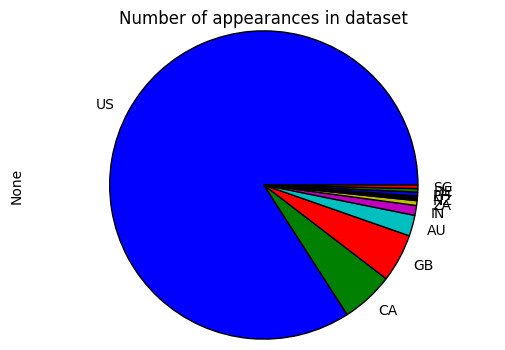

In [42]:
y.plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

## Most of the clicks came from US customers.

In [8]:
usgrp = geogrp.get_group('US')

In [96]:
state = usgrp.groupby(['State'])

In [ ]:
state_series = state.size().sort_values(ascending=False)

In [ ]:
state_series * 100/state_series.sum()

In [ ]:
state.head()

Using https://pypi.python.org/pypi/us

In [24]:
!pip install us

You are using pip version 7.0.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
import us

In [30]:
print(us.states.MD.time_zones)


['America/New_York']


In [10]:
timeoffset = {'America/New_York': 0, 'America/Chicago': 60*60*1000, 'America/Denver': 2 * 60*60*1000, 'America/Los_Angeles': 3* 60*60*1000, 'Pacific/Honolulu':5 * 60*60*1000, 'America/North_Dakota/Center': 60*60*1000, 'America/Indiana/Indianapolis':0, 'America/Anchorage':4*60*60*1000 }

In [11]:
timeoffset

{'America/Anchorage': 14400000,
 'America/Chicago': 3600000,
 'America/Denver': 7200000,
 'America/Indiana/Indianapolis': 0,
 'America/Los_Angeles': 10800000,
 'America/New_York': 0,
 'America/North_Dakota/Center': 3600000,
 'Pacific/Honolulu': 18000000}

In [12]:
usgrp.head()

,display_id,uuid,document_id,timestamp,platform,geo_location,Country,State,DMA
0,1,cb8c55702adb93,379743,61,3,US>SC>519,US,SC,519
1,4259,7110c665e40cdd,1178289,291717,3,US>SC>519,US,SC,519
2,4320,d4d864f476b3ec,1226959,296045,2,US>SC>519,US,SC,519
3,4404,6a7174e486a1fa,26448,300907,3,US>SC>519,US,SC,519
4,4565,1ae3131f93a2d9,1750803,312675,1,US>SC>519,US,SC,519


In [68]:
usgrp = usgrp[usgrp['State'] != 'AA']


In [70]:
usgrp = usgrp[usgrp['State'] != 'AE']


In [72]:
usgrp = usgrp[usgrp['State'] != 'AP']

In [87]:
usgrp = usgrp[usgrp['State'].isnull() == False]

In [88]:
time_adjust = lambda x: x['timestamp'] + timeoffset[us.states.lookup(x['State']).time_zones[0]]
usgrp['time_adjust'] = usgrp.apply(time_adjust, axis=1)


In [97]:
usgrp[['State', 'timestamp', 'time_adjust']][usgrp['State']=='AK'].head()

,State,timestamp,time_adjust
16881132,AK,34104,14434104
16881133,AK,183247,14583247
16881134,AK,248005,14648005
16881135,AK,264295,14664295
16881136,AK,300411,14700411


In [98]:
timestamps_hrly = (usgrp.time_adjust // (3600 * 1000)) % 24


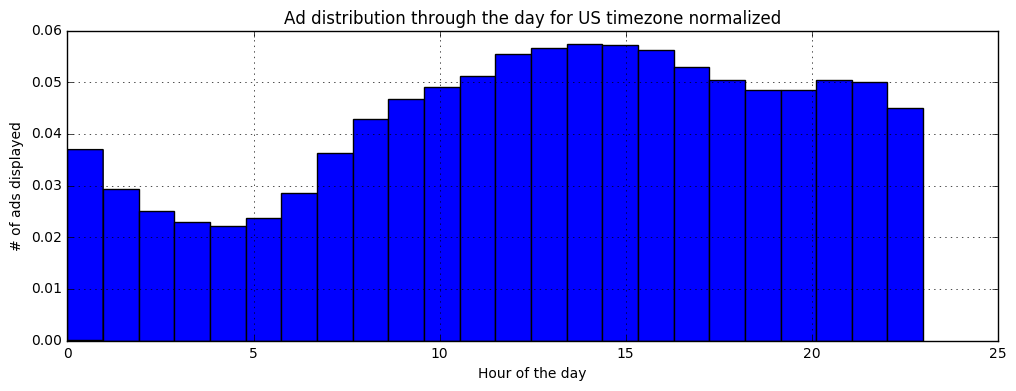

In [99]:
plt.figure(figsize=(12,4))
ax = timestamps_hrly.hist(bins=24, normed=True)
ax.set_xlabel("Hour of the day")
ax.set_ylabel("# of ads displayed")
plt.title("Ad distribution through the day for US timezone normalized")